In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv('Views.csv', encoding='utf-16', sep = '\t')
dataset = dataset.iloc[:, 2:4]
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Date'])

In [3]:
#dataset['Date']
indexedDataset.tail()

,# Analytics Viewed
Date,
2020-06-01,422689
2020-07-01,486219
2020-08-01,425993
2020-09-01,476671
2020-10-01,484762


C:\Users\q1011812\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


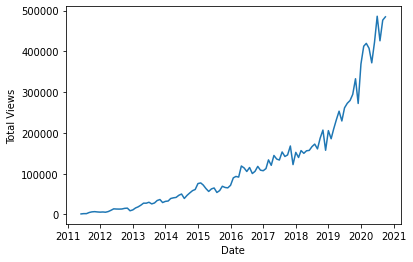

In [4]:
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.plot(indexedDataset)

In [16]:
# Find the rolling statistics
rollingMean = indexedDataset.rolling(window = 12).mean()

rollingSTD = indexedDataset.rolling(window = 12).std()
print(rollingMean, rollingSTD)

            # Analytics Viewed
Date                          
2011-06-01                 NaN
2011-07-01                 NaN
2011-08-01                 NaN
2011-09-01                 NaN
2011-10-01                 NaN
...                        ...
2020-06-01       343071.083333
2020-07-01       361799.583333
2020-08-01       374574.750000
2020-09-01       391003.333333
2020-10-01       406856.166667

[113 rows x 1 columns]             # Analytics Viewed
Date                          
2011-06-01                 NaN
2011-07-01                 NaN
2011-08-01                 NaN
2011-09-01                 NaN
2011-10-01                 NaN
...                        ...
2020-06-01        64545.755457
2020-07-01        71000.864967
2020-08-01        67200.072786
2020-09-01        65937.523446
2020-10-01        63455.622802

[113 rows x 1 columns]


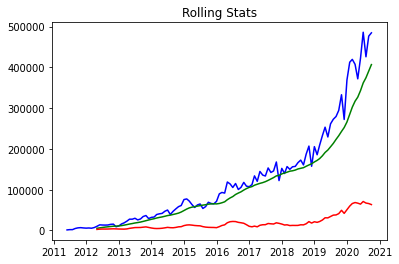

In [17]:
# Plot Rolling Stats

orig = plt.plot(indexedDataset, color = 'blue', label='Original')
mean = plt.plot(rollingMean, color = 'green', label='Rolling Mean')
std = plt.plot(rollingSTD, color='red', label='Rolling STD')
plt.title('Rolling Stats')
plt.show(block=False)

In [18]:
# Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['# Analytics Viewed'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  2.350674
p-value                         0.998985
#Lags Used                     13.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


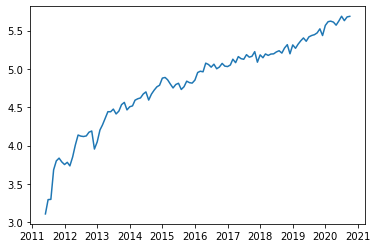

In [19]:
# Estimate the trend
indexedDataset_logScale = np.log10(indexedDataset)
plt.plot(indexedDataset_logScale)

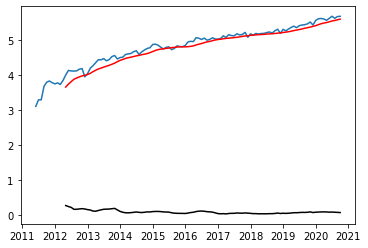

In [20]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window = 12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color = 'black')

In [21]:
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #plot rolling stats:
    
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(movingAverage, color = 'green', label='Rolling Mean')
    std = plt.plot(movingSTD, color='red', label='Rolling STD')
    plt.title('Rolling Stats')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['# Analytics Viewed'], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

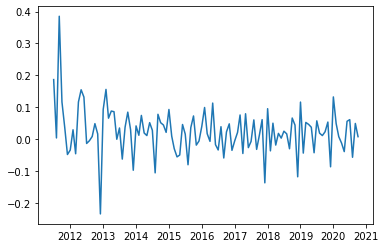

In [22]:
datasetLDShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLDShifting)

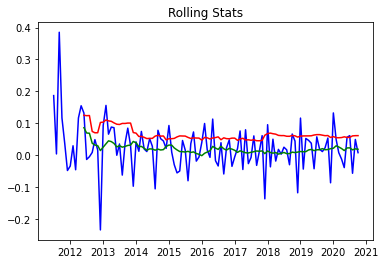

Results of Dickey-Fuller Test:
Test Statistic                  -4.284978
p-value                          0.000472
#Lags Used                      11.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [23]:
datasetLDShifting.dropna(inplace = True)
test_stationary(datasetLDShifting)

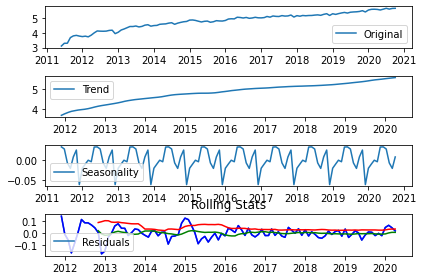

Results of Dickey-Fuller Test:


KeyError: '# Analytics Viewed'

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


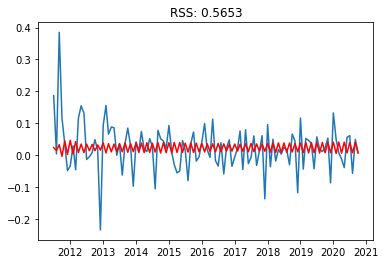

In [39]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLDShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLDShifting['# Analytics Viewed'])**2))
print('Plotting AR Model')

C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


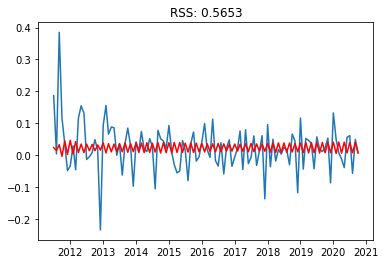

In [40]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_MA = model.fit(disp = -1)
plt.plot(datasetLDShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLDShifting['# Analytics Viewed'])**2))
print('Plotting MA Model')

C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\q1011812\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting ARIMA Model


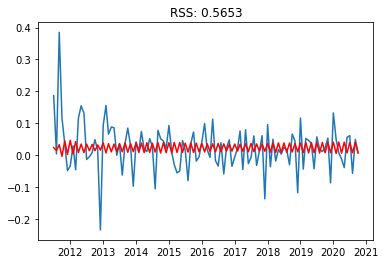

In [41]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLDShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLDShifting['# Analytics Viewed'])**2))
print('Plotting ARIMA Model')

In [42]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2011-07-01    0.023015
2011-08-01    0.013957
2011-09-01    0.032621
2011-10-01   -0.004181
2011-11-01    0.044450
dtype: float64


In [43]:
#Convert to cummulative sum
preductions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(preductions_ARIMA_diff_cumsum.head())

Date
2011-07-01    0.023015
2011-08-01    0.036971
2011-09-01    0.069592
2011-10-01    0.065410
2011-11-01    0.109860
dtype: float64


In [44]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['# Analytics Viewed'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(preductions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\q1011812\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2011-06-01    3.107888
2011-07-01    3.130903
2011-08-01    3.144859
2011-09-01    3.177480
2011-10-01    3.173298
dtype: float64

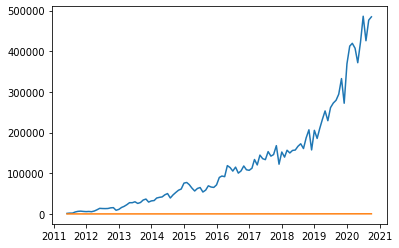

In [45]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

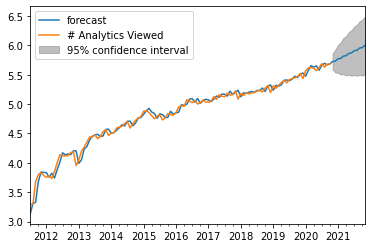

In [46]:
#indexedDataset_logScale.head() - 113rows
results_ARIMA.plot_predict(1, 125)
x=results_ARIMA.forecast(steps=12)

In [47]:
results_ARIMA.forecast(steps = 120)

(array([5.72543608, 5.73156889, 5.77143444, 5.77760916, 5.81743286,
        5.82364937, 5.86343133, 5.86968954, 5.90942986, 5.91572965,
        5.95542843, 5.96176971, 6.00142706, 6.00780972, 6.04742573,
        6.05384968, 6.09342446, 6.09988959, 6.13942324, 6.14592944,
        6.18542208, 6.19196925, 6.23142096, 6.238009  , 6.27741989,
        6.28404871, 6.32341887, 6.33008836, 6.36941791, 6.37612796,
        6.41541699, 6.42216751, 6.46141613, 6.46820702, 6.50741532,
        6.51424647, 6.55341455, 6.56028587, 6.59941384, 6.60632523,
        6.64541317, 6.65236453, 6.69141256, 6.69840378, 6.73741199,
        6.74444299, 6.78341148, 6.79048214, 6.82941101, 6.83652125,
        6.87541059, 6.88256031, 6.92141023, 6.92859932, 6.96740991,
        6.97463828, 7.01340964, 7.02067719, 7.05940942, 7.06671605,
        7.10540924, 7.11275486, 7.15140912, 7.15879363, 7.19740904,
        7.20483235, 7.24340902, 7.25087102, 7.28940904, 7.29690964,
        7.3354091 , 7.34294821, 7.38140922, 7.38

In [48]:
results = results_ARIMA.forecast(steps = 12)
res=[]
for r in results:
    res.append(10**r)

In [49]:
print(res[0])

[531417.77481213 538975.33165948 590791.77899203 599251.53650205
 656799.57383093 666268.63975925 730182.35388407 740780.49094972
 811764.12843628 823625.24329718 902460.97461236 915734.78139034]
